## **Tarea 1:**
#### Entrenar un modelo de regresión lineal para predecir el consumo de energía de un edificio de retail conocida la temperatura ambiente


#### 1. Copia del notebook
Utilice toda la información que se encuentra en el conjunto de datos online para los edificios de tipo retail. Es decir, descargue los archivos para los edificios 1 a 5 y a partir de estos cree un solo conjunto de datos (un único dataframe) en su notebook.

In [1]:
#Aquí importamos las librerías y descargamos la información. 
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### 2. Descarga de datos

In [2]:
#En la siguiente linea se descargan todos los archivos.
filepaths = ['/content/building'+str(i)+'retail.csv' for i in range(1,6)] #Guardamos las rutas de los archivos con list comprehension
if np.all([os.path.isfile(filepaths[i]) for i in range(0,5)]):
  print('Los archivos ya están descargados')
else:
  !wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/b710e97d-29c9-4ca5-8137-63b7cf447317/download/building1retail.csv
  !wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/4d721c37-119c-43c8-a722-a36f5eea26c8/download/building2retail.csv
  !wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/8a91474a-a20d-4dd2-b6a1-e5412a4e6c59/download/building3retail.csv
  !wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/c9b11976-a906-4a41-80b0-7f4b81311a13/download/building4retail.csv
  !wget https://openei.org/datasets/dataset/649aa6d3-2832-4978-bc6e-fa563568398e/resource/d31fa61c-def9-4142-b58d-27f434163892/download/building5retail.csv

Los archivos ya están descargados


#### 3.  Análisis de los datos
Realice un análisis exploratorio de los datos similar al hecho en clase. Es posible extenderlo si lo considera necesario.

In [3]:
df_list = [pd.read_csv(filename) for filename in filepaths]               #Hacemos una lista de dataframes
np.shape(df_list)                                                         #Notemos que df_list tiene 5 dataframes cada uno con 34940 archivos y 3 columnas, podemos concatenarlos facilmente

(5, 34940, 3)

In [4]:
df = pd.concat(df_list, axis=0, ignore_index=True)                        #Nuestro dataframe! Notemos que tiene las entradas correctas ya que 34940*5 = 174700
df

,Timestamp,OAT (F),Power (kW)
0,1/1/2010 1:15,51,165.1
1,1/1/2010 1:30,51,151.6
2,1/1/2010 1:45,51,146.9
3,1/1/2010 2:00,51,153.7
4,1/1/2010 2:15,51,153.8
...,...,...,...
174695,12/30/2010 23:00,67,333.7
174696,12/30/2010 23:15,68,221.0
174697,12/30/2010 23:30,68,235.7
174698,12/30/2010 23:45,68,227.2


In [5]:
#Queremos que nuestro indice sea el tiempo, así que let's go then:
df_list = [pd.read_csv(filename, index_col=[0], parse_dates=True) for filename in filepaths]
df = pd.concat(df_list, axis=0, ignore_index=False)
df

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8
...,...,...
2010-12-30 23:00:00,67,333.7
2010-12-30 23:15:00,68,221.0
2010-12-30 23:30:00,68,235.7


In [6]:
#Miremos si hay datos en Nan o alguna maricada rara:
df.isnull().values.any()

False

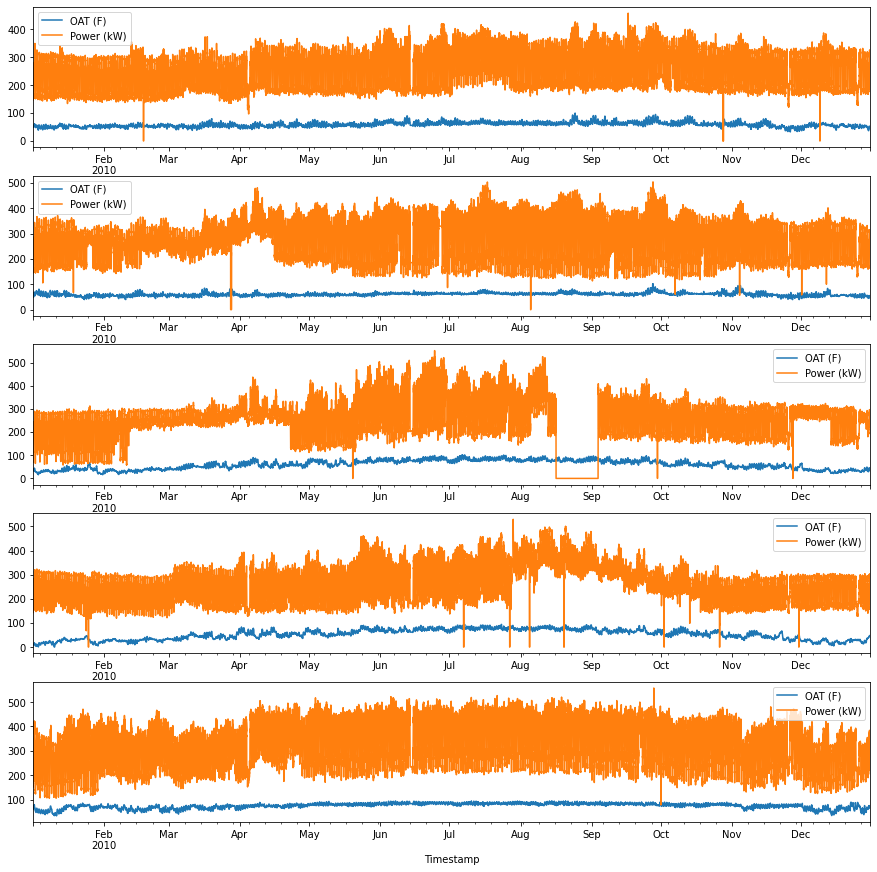

In [7]:
#Grafiquemos los datos por edificio primero:
fig, ax = plt.subplots(5,figsize=(15,15))
for i in range(0,5):
  df_list[i].plot(ax=ax[i])

In [8]:
for i in range(0,5):
  print('Edificio ',i+1,':','Promedio kW: ', df_list[i]['Power (kW)'].mean(), 'Promedio T: ',df_list[i]['OAT (F)'].mean() )

Edificio  1 : Promedio kW:  261.6446594161415 Promedio T:  58.58568975386377
Edificio  2 : Promedio kW:  282.1196422438484 Promedio T:  60.62163709215798
Edificio  3 : Promedio kW:  255.35724098454403 Promedio T:  59.57721808815111
Edificio  4 : Promedio kW:  265.31996279336056 Promedio T:  52.55649685174585
Edificio  5 : Promedio kW:  334.65174585003 Promedio T:  73.79862621637092


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1243d6c210>,
      dtype=object)

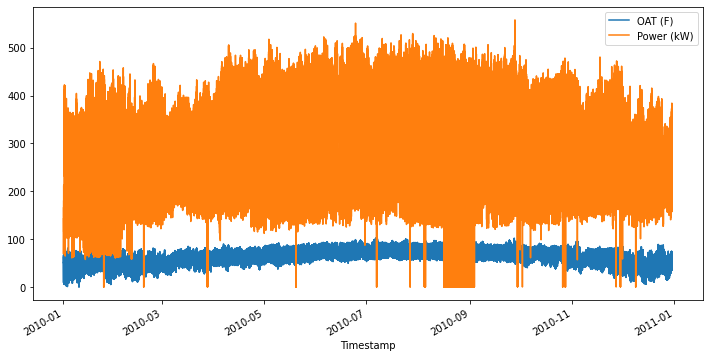

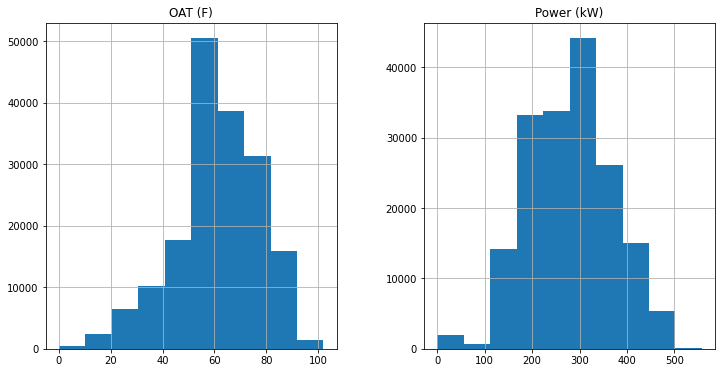

In [9]:
#Ahora miremos los datos gráficamente (Spoiler: se ve horrible porque son muchos)
df.plot(figsize=(12,6))
df.hist(figsize=(12,6))

#### 4. Limpieza

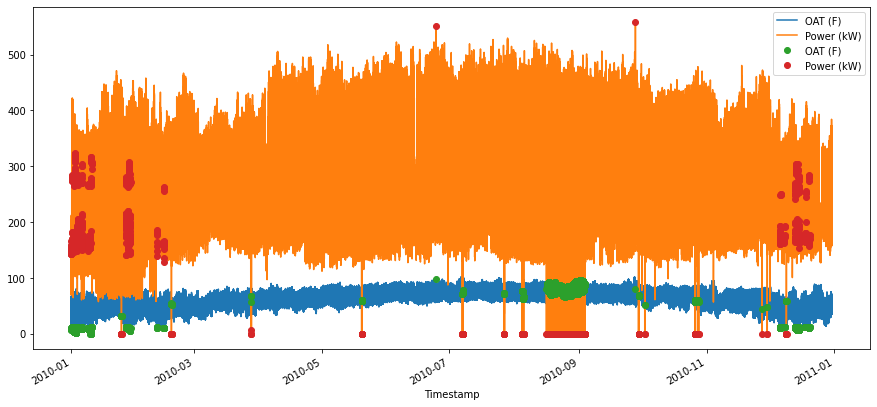

In [10]:
#Limpiemos el dataframe. Ya buscaremos otra manera
outliers = (np.abs(sp.stats.zscore(df)) < 3).any(axis=1)
outliersp = (np.abs(sp.stats.zscore(df)) > 3).any(axis=1) #Para graficar los puntos que removeremos
fig, ax = plt.subplots(figsize=(15,7))
df_limpio = df[outliers]
df_limpio.plot(ax=ax) #Gráfica limpia

df_limpiop = df[outliersp]
df_limpiop.plot(ax=ax,style='o') #Graficar los puntos que quitamos. 

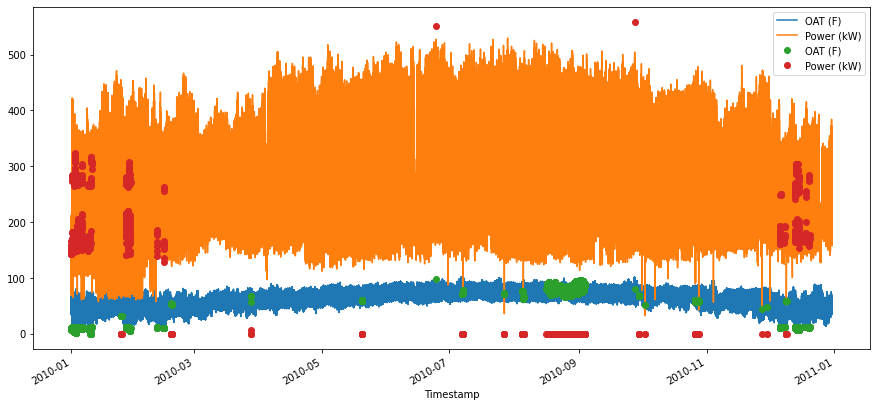

In [11]:
#Hay otra manera de limpiar el dataframe y es sin estandarizar primero los datos
#(por ejemplo, a una puntuación Z con media cero y varianza unitaria) para que la detección de valores atípicos 
# se pueda realizar utilizando valores de corte de puntuación Z estándar, sino realizando los cálculos en la escala original: 

data_mean, data_std = np.mean(df), np.std(df)     #Calculamos los dos valores de mean y std (Tanto para OAT como para Power)
cut_off = data_std * 3                            #Cota a usar
lower, upper = data_mean - cut_off, data_mean + cut_off                                    #Definimos la cota superior y la cota inferior
lowerOAT, lowerP = lower[0], lower[1]; upperOAT, upperP = upper[0], upper[1]               #Para mayor claridad, separamos en la cota OAT o la cota Power

outliersOAT = (df['OAT (F)'].values > lowerOAT) & (df['OAT (F)'].values < upperOAT)        #Juntamos las dos condiciones de cota superior y de cota inferior
outliersPower = (df['Power (kW)'].values > lowerP) & (df['Power (kW)'].values < upperP)    #
outliers = outliersOAT & outliersPower                                                     #Ahora juntamos las condicones de OAT y de Power con un & (si alguna se cumple entonces es True)
outliersp = np.invert(outliers)                   #Invertimos los puntos anteriores para graficarlos.

fig, ax = plt.subplots(figsize=(15,7))
df_clean = df[outliers]
df_clean.plot(ax=ax)
df_cleanp = df[outliersp]
df_cleanp.plot(ax=ax,style='o') #Graficar los puntos que quitamos. 

Notemos que el método anterior eliminó muchos más puntos que el previamente usado en clase, y ahora los picos no llegan tan abajo ni tan arriba.

#### 5. Entrenamiento de referencia
Realice un primer entrenamiento del modelo y calcule el puntaje (R-cuadrado) de este usando únicamente la información provista en el conjunto de datos. Este modelo servirá como punto de comparación.

In [12]:
#Saquemos el score para el punto de comparación
X = pd.DataFrame(df['OAT (F)'])
Y = pd.DataFrame(df['Power (kW)'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42) #Test size del 33% y una semilla para tomar filas. Random state.
linear_regression = LinearRegression()
linear_regression.fit(X_train,Y_train)
ref_score = linear_regression.score(X_test,Y_test)
print('Score de referencia: ',ref_score)

Score de referencia:  0.2567997599732196


In [13]:
#Miremos como aumenta el score con el dataframe limpio:
X = pd.DataFrame(df_clean['OAT (F)'])
Y = pd.DataFrame(df_clean['Power (kW)'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
linear_regression = LinearRegression() 
linear_regression.fit(X_train,Y_train)
linear_regression.score(X_test,Y_test)
print('Score: ',np.round(linear_regression.score(X_test,Y_test),3))
print('Aumento del score: ', np.round(100*np.abs(ref_score - linear_regression.score(X_test,Y_test)),3), '%' )

Score:  0.345
Aumento del score:  8.822 %


#### 6. Agregar predictores
Aumente el conjunto de datos agregando predictores cuantitativos como también cualitativos. Compare el puntaje del modelo y argumente si la nueva información es valiosa o no para mejorar la predicción.

Metamos de una vez la hora:

In [14]:
try:
  df = df.drop(columns=['hour'])  
except:
  print('La columna hora ya fue borrada')
df['hour'] = df.index.hour
X = pd.DataFrame(df[['OAT (F)','hour']])
Y = pd.DataFrame(df['Power (kW)'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42) #Test size del 33% y una semilla para tomar filas. Random state.
linear_regression = LinearRegression() #Instancia de la clase que importamos. 
linear_regression.fit(X_train,Y_train)
print('Score: ',np.round(linear_regression.score(X_test,Y_test),3) )
print('Aumento del score: ', np.round(100*np.abs(ref_score - linear_regression.score(X_test,Y_test)),3), '%' )


La columna hora ya fue borrada
Score:  0.478
Aumento del score:  22.164 %


Podemos explorar los días o las semanas como una variable. Por ejemplo, qué pasan los fines de semana?

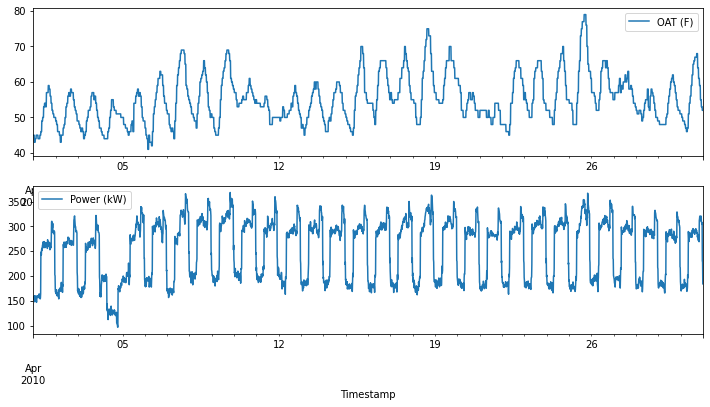

In [15]:
fig, ax = plt.subplots(2,figsize=(12,6))
df_list[0].loc['2010-04', ['OAT (F)']].plot(ax=ax[0])
df_list[0].loc['2010-04', ['Power (kW)']].plot(ax=ax[1])

In [16]:
try:
  df = df.drop(columns=['days'])  
except:
  print('La columna ya fue borrada')
  
df['days'] = df.index.day
X = pd.DataFrame(df[['OAT (F)','days']])
Y = pd.DataFrame(df['Power (kW)'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42) #Test size del 33% y una semilla para tomar filas. Random state.
linear_regression = LinearRegression() #Instancia de la clase que importamos. 
linear_regression.fit(X_train,Y_train)
print('Score: ',np.round(linear_regression.score(X_test,Y_test),3) )
print('Aumento del score: ', np.round(100*np.abs(ref_score - linear_regression.score(X_test,Y_test)),3), '%' )

La columna ya fue borrada
Score:  0.258
Aumento del score:  0.146 %


Bueno, lo anterior no sirvió de nada, intentemos ver algún comportamiento par o impar elevando las variables al cuadrado, pues en la gráfica anterior parece haber un comportamiento periódico. 

In [17]:
try:
  df = df.drop(columns=['days'])  
except:
  print('La columna ya fue borrada')

#Segunda potencia:
df['OAT2'] = df['OAT (F)'].values*df['OAT (F)'].values
df['hour2'] = df['hour'].values*df['hour'].values
df['hour3'] = df['hour2'].values*df['hour'].values
df['OAThour'] = df['OAT (F)'].values*df['hour'].values

X = pd.DataFrame(df[['OAT (F)','OAT2','hour','hour2','hour3']])
Y = pd.DataFrame(df['Power (kW)'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42) #Test size del 33% y una semilla para tomar filas. Random state.
linear_regression = LinearRegression() #Instancia de la clase que importamos. 
linear_regression.fit(X_train,Y_train)
print('Score: ',np.round(linear_regression.score(X_test,Y_test),3) )
print('Aumento del score: ', np.round(100*np.abs(ref_score - linear_regression.score(X_test,Y_test)),3), '%' )

Score:  0.603
Aumento del score:  34.599 %


Añadir las variables al cuadrado sube bastante el score, pero elevarlas al cubo da casi lo mismo, veamos:

In [18]:
#Tercera potencia
df['OAT3'] = df['OAT2'].values*df['OAT (F)'].values
df['hour3'] = df['hour2'].values*df['hour'].values
df['OAT2hour'] = df['OAT2'].values*df['hour'].values
df['hour2OAT']= df['hour2'].values*df['OAT (F)'].values

X = pd.DataFrame(df[['OAT (F)','OAT2','OAT3','hour','hour2','hour3','OAT2hour','hour2OAT']])
Y = pd.DataFrame(df['Power (kW)'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42) #Test size del 33% y una semilla para tomar filas. Random state.
linear_regression = LinearRegression() #Instancia de la clase que importamos. 
linear_regression.fit(X_train,Y_train)
print('Score: ',np.round(linear_regression.score(X_test,Y_test),3) )
print('Aumento del score: ', np.round(100*np.abs(ref_score - linear_regression.score(X_test,Y_test)),3), '%' )

Score:  0.605
Aumento del score:  34.785 %


##### Experimento: 
¿qué pasa si usamos la hora del día como una variable categórica en vez de una variable cuantitativa en nuestro modelo? Observe el comportamiento de la temperatura en función de la hora.

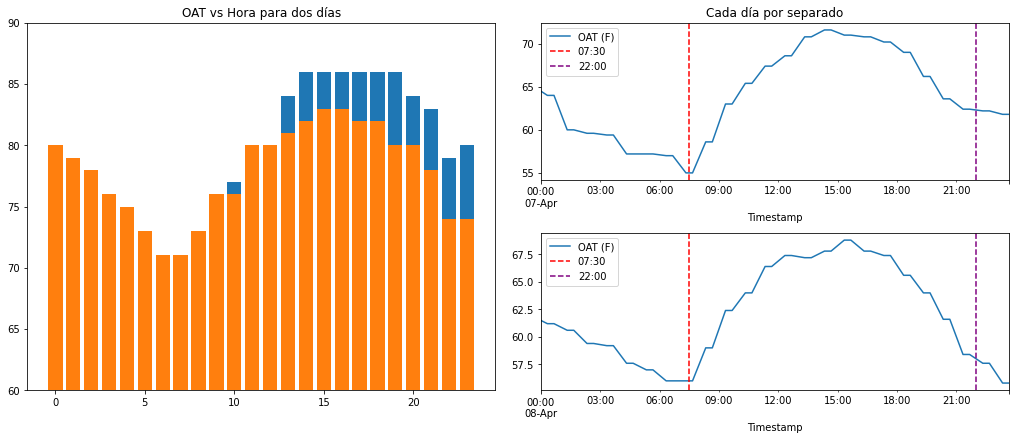

In [19]:
import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True,figsize=(14,6))
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(spec[0:2, 0])
ax1.bar(df_clean.loc['2010-04-07'].index.hour,df_clean.loc['2010-04-07']['OAT (F)'] )
ax1.bar(df_clean.loc['2010-04-08'].index.hour,df_clean.loc['2010-04-08']['OAT (F)'] )
ax1.set_ylim(60,90)
ax1.set_title('OAT vs Hora para dos días')

abierto1 = pd.to_datetime('2010-04-07 07:30:00');abierto2 = pd.to_datetime('2010-04-08 07:30:00')
cerrado1 = pd.to_datetime('2010-04-07 22:00:00');cerrado2 = pd.to_datetime('2010-04-08 22:00:00')

ax2 = fig.add_subplot(spec[0, 1])
df_clean.loc['2010-04-07'].groupby(pd.Grouper(freq='20Min')).mean().plot(y='OAT (F)',ax=ax2)
ax2.axvline(abierto1,color='red',ls='--',label=abierto1.strftime('%H:%M'))
ax2.axvline(cerrado1,color='purple',ls='--',label=cerrado1.strftime('%H:%M'))
ax2.set_title('Cada día por separado')
ax2.legend()

ax3 = fig.add_subplot(spec[1, 1])
df_clean.loc['2010-04-08'].groupby(pd.Grouper(freq='20Min')).mean().plot(y='OAT (F)',ax=ax3)
ax3.axvline(abierto2,color='red',ls='--',label=abierto2.strftime('%H:%M'))
ax3.axvline(cerrado2,color='purple',ls='--',label=cerrado2.strftime('%H:%M'))
ax3.legend()


Las figuras anteriores nos llevan a pensar que hay una hora de apertura (7:30h) donde la energía empieza a crecer, y una hora de cerrada (22h aprox). Podemos usar esto para crear la variable categorica. También podríamos usar día y noche, sin embargo esto es ambiguo porque por allá no hay una hora fija para esta.   

In [20]:
try: 
  df = df.drop(columns=['hour'])
except:
  print('Ya la columna hour está borrada')

df['open_hours'] = np.where((df.index.hour >= 7.5) & (df.index.hour <= 22),1,0)
X = pd.DataFrame(df[['OAT (F)','open_hours']])
Y = pd.DataFrame(df['Power (kW)'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42) #Test size del 33% y una semilla para tomar filas. Random state.
linear_regression = LinearRegression() #Instancia de la clase que importamos. 
linear_regression.fit(X_train,Y_train)
print('Score: ',np.round(linear_regression.score(X_test,Y_test),3) )
print('Aumento del score: ', np.round(100*np.abs(ref_score - linear_regression.score(X_test,Y_test)),3), '%' )

Score:  0.585
Aumento del score:  32.788 %


* Nota: Al variar las lineas verticales se notó que el score obtenido depende mucho de elegir correctamente las horas, dando diferencias de hasta 5% entre escoger el rango 7:00-21:00 a escoger el de 7:30-22:00.

#### 7. Modelo final
Cree un modelo final con los predictores aumentados. ¿Cuál es el puntaje de este modelo comparado con el modelo inicial?


In [21]:

df_clean['hour'] = df_clean.index.hour
df_clean['open_hours'] = np.where((df_clean.index.hour >= 7.5) & (df_clean.index.hour <= 22),1,0)

df_clean['OAT2'] = df_clean['OAT (F)'].values*df_clean['OAT (F)'].values
df_clean['hour2'] = df_clean['hour'].values*df_clean['hour'].values
df_clean['hour3'] = df_clean['hour2'].values*df_clean['hour'].values
df_clean['OAThour'] = df_clean['OAT (F)'].values*df_clean['hour'].values
X = pd.DataFrame(df_clean[['open_hours','hour','hour2','OAT (F)','OAT2','OAThour']])
Y = pd.DataFrame(df_clean['Power (kW)'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42) #Test size del 33% y una semilla para tomar filas. Random state.
linear_regression = LinearRegression() #Instancia de la clase que importamos. 
linear_regression.fit(X_train,Y_train)
print('Score: ',np.round(linear_regression.score(X_test,Y_test),3) )
print('Aumento del score: ', np.round(100*np.abs(ref_score - linear_regression.score(X_test,Y_test)),3), '%' )

Score:  0.763
Aumento del score:  50.574 %
